**Revist the Breast Cancer Wisconsin data from sklearn. I use this dataset in the Perceptron and Logistic Regression notebook. However, the accuracy rate is below 90%. I want to see whether KNN improves the classification results**

Load necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

Load the Breast Cancer Wisconsin data

/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

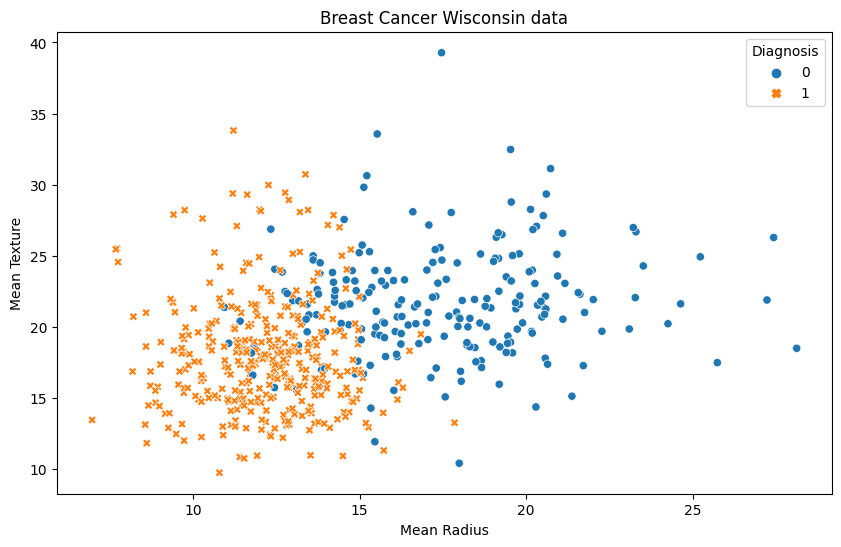

In [2]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x = "mean radius", y = "mean texture",
                hue = 'target', data = df, style = 'target')

plt.title('Breast Cancer Wisconsin data')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

plt.legend(title='Diagnosis')
plt.show()

Split the data into 30% training and 70% testing

In [3]:
X = data.data[:,[0,1]]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Build the KNN function

In [4]:
# define a Euclidean distance
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

# define the KNN function
def k_nearest_neighbors(point,training_features,training_labels,k):
    neighbors = []
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
    
    neighbors.sort(key = lambda x: x[-1])

    return neighbors[:k]

# define the KNN prediction function
def KNN_Predict(point,training_features,training_labels,k, regression=False):
    neighbors = k_nearest_neighbors(point,training_features,training_labels,k)

    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    else:
        return sum(x[1] for x in neighbors)/k

Build the classification error function

In [5]:
def classification_accuracy(test_features,test_labels,training_features,training_labels,k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, training_features, training_labels, k)
    
    return 1 - error/len(test_features)

Apply the algorithm to the testing data

In [6]:
classification_accuracy(X_test, y_test, X_train, y_train, 5)

0.8596491228070176

<span style="color: blue;">In summary, we get a 86% accuracy rate by applying KNN to the Breast Cancer Wisconsin data. It performs well given the short time used.</span>

We now try to find which K value is optimal

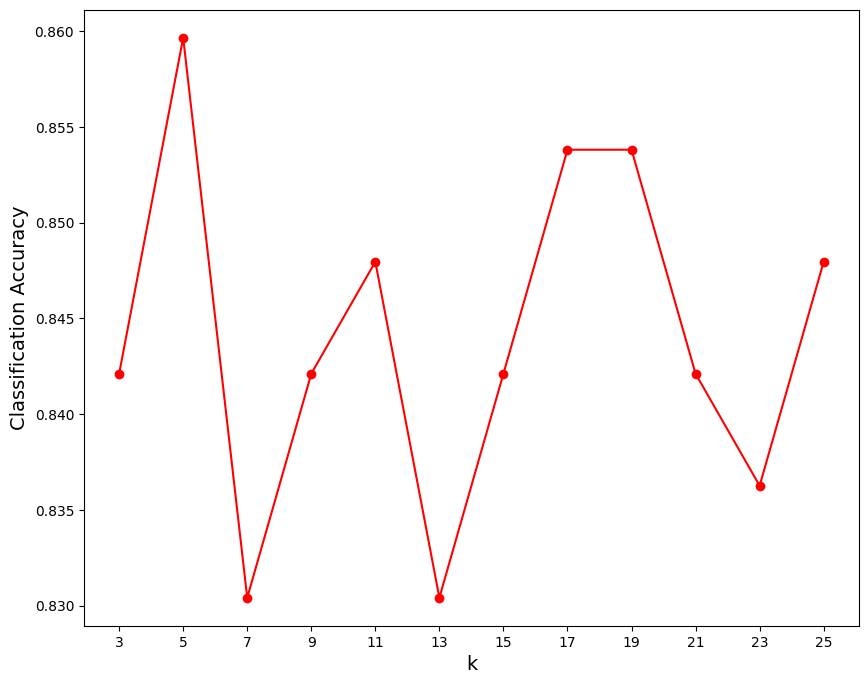

In [7]:
possible_k = [k for k in range(3, 26, 2)]
accuracy = [classification_accuracy(X_test, y_test, X_train, y_train, k) for k in possible_k]

plt.figure(figsize = (10, 8))
plt.plot(possible_k, accuracy, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Accuracy', fontsize = 14)
plt.xticks(possible_k)
plt.show()

<span style="color: blue;">We find that k = 5 is the optimal number.</span>

Using sklearn to realize KNN algorithm

In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8596491228070176

<span style="color: blue;">We get the same result as our algorithm.</span>

Visualizing the decision boundary generated by KNN

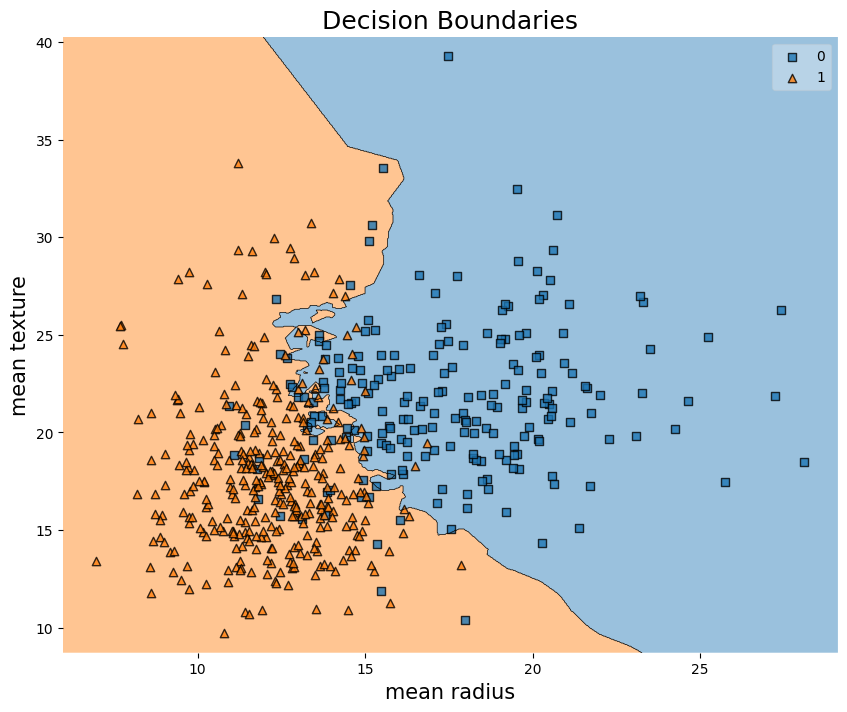

In [9]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("mean radius", fontsize = 15)
plt.ylabel("mean texture", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

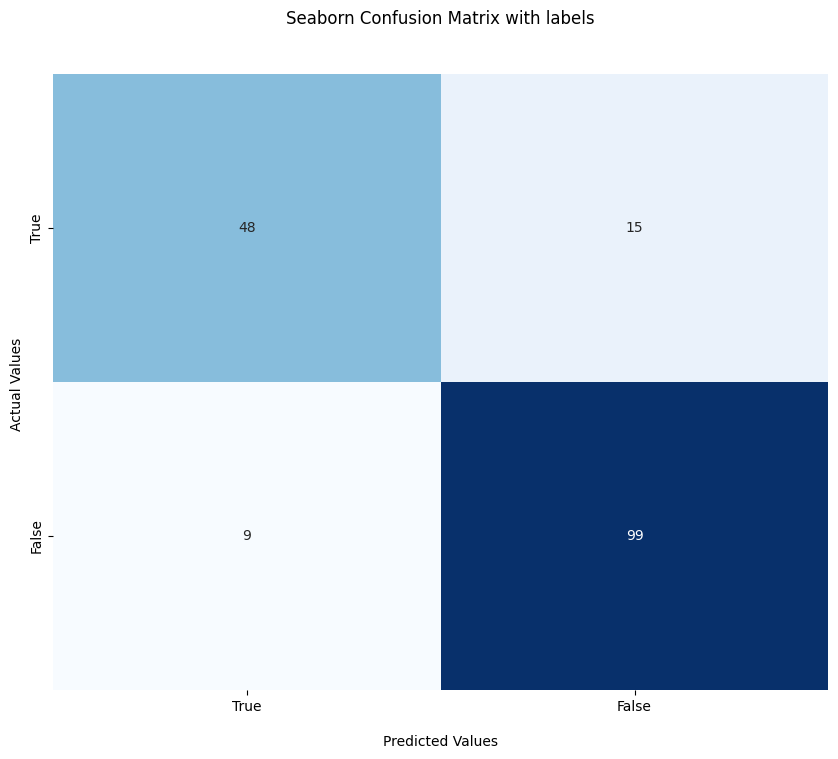

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

---

### Conclusion

In summary, the K-Nearest Neighbors algoritm has a good performance in the classification task. Even though it doesn't outperform Perceptron and Logistic Regression in the Breast Cancer Wisconsin data, it still has a good performance and is easy to build. Given the small size of the data, it also run quickly.